#Youtube Adview Prediction

importing python libraries

In [87]:
import numpy as np
import pandas as pd
import matplotlib.cm as cm
import matplotlib.pyplot as plt

importing data i.e., train.csv file

In [88]:
data_train = pd.DataFrame(pd.read_csv('/train.csv'))

In [89]:
data_train.head()

,vidid,adview,views,likes,dislikes,comment,published,duration,category
0,VID_18655,40,1031602,8523,363,1095,2016-09-14,PT7M37S,F
1,VID_14135,2,1707,56,2,6,2016-10-01,PT9M30S,D
2,VID_2187,1,2023,25,0,2,2016-07-02,PT2M16S,C
3,VID_23096,6,620860,777,161,153,2016-07-27,PT4M22S,H
4,VID_10175,1,666,1,0,0,2016-06-29,PT31S,D


In [90]:
data_train.shape

(14999, 9)

#Visualization

Individual Plot

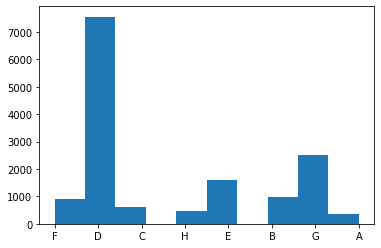

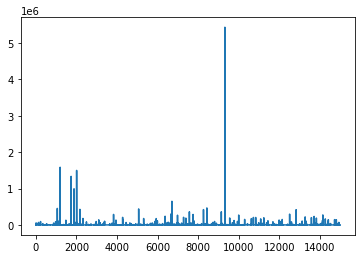

In [91]:
plt.hist(data_train['category'])
plt.show()
plt.plot(data_train['adview'])
plt.show()

Removing videos with adview greater than 2000000 as outliers

In [92]:
data_train = data_train[data_train['adview'] < 2000000]

Heatmap

In [93]:
import seaborn as sns

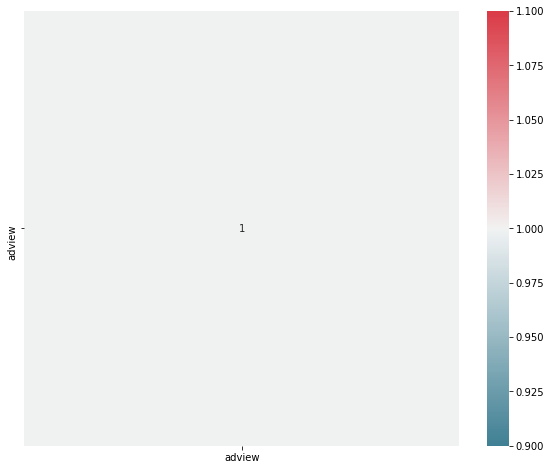

In [94]:
f, ax = plt.subplots(figsize = (10, 8))
corr = data_train.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square = True, ax=ax, annot=True)
plt.show()

Removing character 'F' present in the train.csv

In [95]:
data_train = data_train[data_train.views != 'F']
data_train = data_train[data_train.likes != 'F']
data_train = data_train[data_train.dislikes != 'F']
data_train = data_train[data_train.comment != 'F']

In [96]:
data_train.head()

,vidid,adview,views,likes,dislikes,comment,published,duration,category
0,VID_18655,40,1031602,8523,363,1095,2016-09-14,PT7M37S,F
1,VID_14135,2,1707,56,2,6,2016-10-01,PT9M30S,D
2,VID_2187,1,2023,25,0,2,2016-07-02,PT2M16S,C
3,VID_23096,6,620860,777,161,153,2016-07-27,PT4M22S,H
4,VID_10175,1,666,1,0,0,2016-06-29,PT31S,D


Assigning each category a number for Category Feature

In [97]:
category = {'A': 1, 'B': 2, 'C': 3, 'D': 4, 'E': 5, 'F': 6, 'G': 7, 'H': 8}
data_train['category'] = data_train['category'].map(category)
data_train.head()

,vidid,adview,views,likes,dislikes,comment,published,duration,category
0,VID_18655,40,1031602,8523,363,1095,2016-09-14,PT7M37S,6
1,VID_14135,2,1707,56,2,6,2016-10-01,PT9M30S,4
2,VID_2187,1,2023,25,0,2,2016-07-02,PT2M16S,3
3,VID_23096,6,620860,777,161,153,2016-07-27,PT4M22S,8
4,VID_10175,1,666,1,0,0,2016-06-29,PT31S,4


Converting values to integers for views, comment, likes, dislikes and adview

In [98]:
data_train['views'] = pd.to_numeric(data_train['views'])
data_train['comment'] = pd.to_numeric(data_train['comment'])
data_train['likes'] = pd.to_numeric(data_train['likes'])
data_train['dislikes'] = pd.to_numeric(data_train['dislikes'])
data_train['adview'] = pd.to_numeric(data_train['adview'])

In [99]:
column_vidid = data_train['vidid']

Encoding features like duration, vidid and published



In [100]:
from sklearn.preprocessing import LabelEncoder
data_train['duration'] = LabelEncoder().fit_transform(data_train['duration'])
data_train['vidid'] = LabelEncoder().fit_transform(data_train['vidid'])
data_train['published'] = LabelEncoder().fit_transform(data_train['published'])

In [101]:
data_train.head()

,vidid,adview,views,likes,dislikes,comment,published,duration,category
0,5912,40,1031602,8523,363,1095,2168,2925,6
1,2741,2,1707,56,2,6,2185,3040,4
2,8138,1,2023,25,0,2,2094,1863,3
3,9004,6,620860,777,161,153,2119,2546,8
4,122,1,666,1,0,0,2091,1963,4


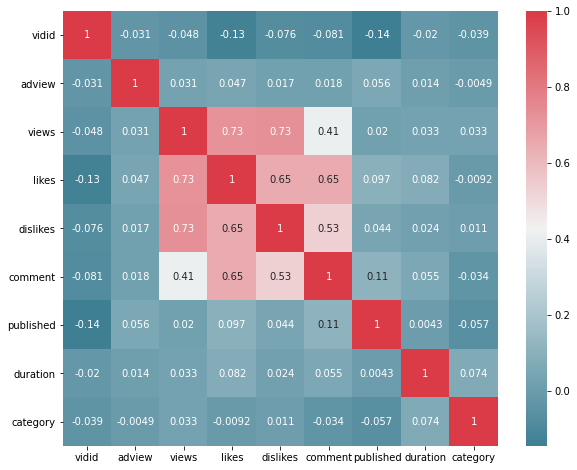

In [102]:
f, ax = plt.subplots(figsize = (10, 8))
corr = data_train.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square = True, ax=ax, annot=True)
plt.show()

Converting time in seconds for Duration

In [103]:
import datetime
import time

In [104]:
def checki(x):
  y = x[2:]
  h = ''
  m = ''
  s = ''
  mm = ''
  P = ['H', 'M', 'S']
  for i in y:
    if i not in P:
      mm += i
    else:
      if(i == 'H'):
        h = mm
        mm = ''
      elif(i == 'M'):
        m = mm
        mm = ''
      else:
        s = mm
        mm = ''
  if(h == ''):
    h = '00'
  if(m == ''):
    m = '00'
  if(s == ''):
    s = '00'
  bp = h+':'+m+':'+s
  return bp

train = pd.read_csv("/train.csv")
mp = pd.read_csv('/train.csv')['duration']
time = mp.apply(checki)

In [105]:
def func_sec(time_string):
  h, m, s = time_string.split(':')
  return int(h) * 3600 + int(m) * 60 + int(s)

In [106]:
time1 = time.apply(func_sec)

In [107]:
data_train['duration'] = time1
data_train.head()

,vidid,adview,views,likes,dislikes,comment,published,duration,category
0,5912,40,1031602,8523,363,1095,2168,457,6
1,2741,2,1707,56,2,6,2185,570,4
2,8138,1,2023,25,0,2,2094,136,3
3,9004,6,620860,777,161,153,2119,262,8
4,122,1,666,1,0,0,2091,31,4


Split Data

In [108]:
Y_train = pd.DataFrame(data = data_train.iloc[:, 1].values, columns = ['target'])
data_train = data_train.drop(['adview'], axis=1)
data_train = data_train.drop(['vidid'], axis=1)
data_train.head()

,views,likes,dislikes,comment,published,duration,category
0,1031602,8523,363,1095,2168,457,6
1,1707,56,2,6,2185,570,4
2,2023,25,0,2,2094,136,3
3,620860,777,161,153,2119,262,8
4,666,1,0,0,2091,31,4


In [109]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(data_train, Y_train, 
                                                test_size=0.2, random_state=42)

In [110]:
X_train.shape

(11708, 7)

Normalise Data

In [111]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [112]:
X_train.mean()

0.1739096800320488

Evaluation Metrics

In [113]:
from sklearn import metrics
def print_error(X_test, Y_test, model_name):
  prediction = model_name.predict(X_test)
  print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test, prediction))
  print('Mean Squared Error:', metrics.mean_squared_error(Y_test, prediction))
  print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test, prediction)))

Linear Regression

In [114]:
from sklearn import linear_model
linear_regression = linear_model.LinearRegression()
linear_regression.fit(X_train, Y_train)
print_error(X_test, Y_test, linear_regression)

Mean Absolute Error: 3707.378005824532
Mean Squared Error: 835663131.1210337
Root Mean Squared Error: 28907.83857573986


Support Vector Regression

In [115]:
from sklearn.svm import SVR
supportvector_regressor = SVR()
supportvector_regressor.fit(X_train, Y_train)
print_error(X_test, Y_test, supportvector_regressor)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Mean Absolute Error: 1696.9438599505638
Mean Squared Error: 833685776.029172
Root Mean Squared Error: 28873.617300732723


Decision Tree Regressor

In [116]:
from sklearn.tree import DecisionTreeRegressor
decision_tree = DecisionTreeRegressor()
decision_tree.fit(X_train, Y_train)
print_error(X_test, Y_test, decision_tree)

Mean Absolute Error: 2760.411543715847
Mean Squared Error: 903428392.381489
Root Mean Squared Error: 30057.085560338164


Random Forest Regressor

In [117]:
from sklearn.ensemble import RandomForestRegressor
n_estimators = 200
max_depth = 25
min_samples_split = 15
min_samples_leaf = 2
random_forest = RandomForestRegressor(n_estimators = n_estimators,
                  max_depth = max_depth, min_samples_split = min_samples_split)
random_forest.fit(X_train, Y_train)
print_error(X_test, Y_test, random_forest)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


Mean Absolute Error: 3314.520093823536
Mean Squared Error: 624288431.4685699
Root Mean Squared Error: 24985.76457642571


Artificial Neural Networks

In [118]:
import keras
from keras.layers import Dense

In [119]:
ann = keras.models.Sequential([
                               Dense(6, activation = 'relu',
                               input_shape = X_train.shape[1:]),
                               Dense(6, activation = 'relu'),
                               Dense(1)
                              ])

In [120]:
optimizer = keras.optimizers.Adam()
loss = keras.losses.mean_squared_error
ann.compile(optimizer=optimizer, loss=loss, metrics=['mean_squared_error'])

In [121]:
history = ann.fit(X_train, Y_train, epochs = 100)

Epoch 1/100
366/366 [==============================] - 1s 855us/step - loss: 569059870.0232 - mean_squared_error: 569059870.0232
Epoch 2/100
366/366 [==============================] - 0s 782us/step - loss: 691849361.8052 - mean_squared_error: 691849361.8052
Epoch 3/100
366/366 [==============================] - 0s 880us/step - loss: 2103222864.9155 - mean_squared_error: 2103222864.9155
Epoch 4/100
366/366 [==============================] - 0s 882us/step - loss: 1558414986.7287 - mean_squared_error: 1558414986.7287
Epoch 5/100
366/366 [==============================] - 0s 864us/step - loss: 1148847651.5749 - mean_squared_error: 1148847651.5749
Epoch 6/100
366/366 [==============================] - 0s 786us/step - loss: 1027521823.1880 - mean_squared_error: 1027521823.1880
Epoch 7/100
366/366 [==============================] - 0s 784us/step - loss: 594667474.4932 - mean_squared_error: 594667474.4932
Epoch 8/100
366/366 [==============================] - 0s 813us/step - loss: 709337198.50

In [122]:
ann.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 6)                 48        
_________________________________________________________________
dense_4 (Dense)              (None, 6)                 42        
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 7         
Total params: 97
Trainable params: 97
Non-trainable params: 0
_________________________________________________________________


In [123]:
print_error(X_test, Y_test, ann)

Mean Absolute Error: 3303.0598352880424
Mean Squared Error: 829688319.65661
Root Mean Squared Error: 28804.310782530625


Saving Scikitlearn models

In [124]:
import joblib
joblib.dump(decision_tree, 'decisiontree_youtubeadview.pkl')

['decisiontree_youtubeadview.pkl']

Saving Keras Artificial Neural Network Model

In [125]:
ann.save('ann_youtubeadview.h5')

#Prediction of Adview

Importing test data


In [126]:
data_test = pd.DataFrame(pd.read_csv('/test.csv'))

In [127]:
data_test.head()

,vidid,views,likes,dislikes,comment,published,duration,category
0,VID_1054,440238,6153,218,1377,2017-02-18,PT7M29S,B
1,VID_18629,1040132,8171,340,1047,2016-06-28,PT6M29S,F
2,VID_13967,28534,31,11,1,2014-03-10,PT37M54S,D
3,VID_19442,1316715,2284,250,274,2010-06-05,PT9M55S,G
4,VID_770,1893173,2519,225,116,2016-09-03,PT3M8S,B


In [128]:
data_test.shape

(8764, 8)

Preprocessing the data

In [129]:
data_test = data_test[data_test.views != 'F']
data_test = data_test[data_test.likes != 'F']
data_test = data_test[data_test.dislikes != 'F']
data_test = data_test[data_test.comment != 'F']

In [130]:
data_test.head()

,vidid,views,likes,dislikes,comment,published,duration,category
0,VID_1054,440238,6153,218,1377,2017-02-18,PT7M29S,B
1,VID_18629,1040132,8171,340,1047,2016-06-28,PT6M29S,F
2,VID_13967,28534,31,11,1,2014-03-10,PT37M54S,D
3,VID_19442,1316715,2284,250,274,2010-06-05,PT9M55S,G
4,VID_770,1893173,2519,225,116,2016-09-03,PT3M8S,B


In [131]:
category = {'A': 1, 'B': 2, 'C': 3, 'D': 4, 'E': 5, 'F': 6, 'G': 7, 'H': 8}
data_test['category'] = data_test['category'].map(category)
data_test.head()

,vidid,views,likes,dislikes,comment,published,duration,category
0,VID_1054,440238,6153,218,1377,2017-02-18,PT7M29S,2
1,VID_18629,1040132,8171,340,1047,2016-06-28,PT6M29S,6
2,VID_13967,28534,31,11,1,2014-03-10,PT37M54S,4
3,VID_19442,1316715,2284,250,274,2010-06-05,PT9M55S,7
4,VID_770,1893173,2519,225,116,2016-09-03,PT3M8S,2


In [132]:
data_test['views'] = pd.to_numeric(data_test['views'])
data_test['comment'] = pd.to_numeric(data_test['comment'])
data_test['likes'] = pd.to_numeric(data_test['likes'])
data_test['dislikes'] = pd.to_numeric(data_test['dislikes'])

In [133]:
column_vidid = data_test['vidid']

In [134]:
from sklearn.preprocessing import LabelEncoder
data_test['duration'] = LabelEncoder().fit_transform(data_test['duration'])
data_test['vidid'] = LabelEncoder().fit_transform(data_test['vidid'])
data_test['published'] = LabelEncoder().fit_transform(data_test['published'])
data_test.head()

,vidid,views,likes,dislikes,comment,published,duration,category
0,231,440238,6153,218,1377,2053,2115,2
1,3444,1040132,8171,340,1047,1825,2055,6
2,1593,28534,31,11,1,1009,1506,4
3,3775,1316715,2284,250,274,116,2265,7
4,7644,1893173,2519,225,116,1892,1625,2


In [135]:
train=pd.read_csv('/test.csv')
mp = pd.read_csv('/test.csv')['duration']
time = mp.apply(checki)

def func_sec(time_string):
  h, m, s = time_string.split(':')
  return int(h) * 3600 + int(m) * 60 + int(s)

time1=time.apply(func_sec)

data_test['duration']=time1
data_test.head()

,vidid,views,likes,dislikes,comment,published,duration,category
0,231,440238,6153,218,1377,2053,449,2
1,3444,1040132,8171,340,1047,1825,389,6
2,1593,28534,31,11,1,1009,2274,4
3,3775,1316715,2284,250,274,116,595,7
4,7644,1893173,2519,225,116,1892,188,2


In [136]:
data_test=data_test.drop(['vidid'],axis=1)
data_test.head()

,views,likes,dislikes,comment,published,duration,category
0,440238,6153,218,1377,2053,449,2
1,1040132,8171,340,1047,1825,389,6
2,28534,31,11,1,1009,2274,4
3,1316715,2284,250,274,116,595,7
4,1893173,2519,225,116,1892,188,2


In [137]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_test = data_test
X_test=scaler.fit_transform(X_test)

In [138]:
from keras.models import load_model
model = load_model("/content/ann_youtubeadview.h5")

In [139]:
prediction = model.predict(X_test)

In [140]:
prediction=pd.DataFrame(prediction)
prediction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8549 entries, 0 to 8548
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       8549 non-null   float32
dtypes: float32(1)
memory usage: 33.5 KB


In [141]:
prediction = prediction.rename(columns={0: 'adview'})

In [142]:
prediction.head()

,adview
0,2131.781738
1,2352.026123
2,1426.000000
3,1292.688110
4,2043.316528


In [143]:
prediction.to_csv('predictions.csv')